# MSD dataset for SLAM

## Graph Matching with GNN from scratch

### Dataset visualization and Preprocessing

In [ ]:
original_graphs, noise_graphs, dimensions = deserialize_MSD_dataset("data")

# Check the number of graphs
print(f"Number of original graphs: {len(original_graphs)}")
print(f"Number of noise graphs: {len(noise_graphs)}")

Number of original graphs: 0
Number of noise graphs: 0


 Checks on dataset

In [ ]:
assert len(original_graphs) == len(dimensions), "Number of original and dimensions must be the same dim"
tot_graphs = 0
for i in range(len(dimensions)):
    tot_graphs += dimensions[i]
assert len(noise_graphs) == tot_graphs, "Number of noise graphs must be equal to the sum of dimensions"

for i, graph in enumerate(original_graphs):
    assert i == int(graph.graph['name']), "Graph name must match the index"

blocks = []
start = 0
for size in dimensions:
    end = start + size
    blocks.append(noise_graphs[start:end])
    start = end

def assert_block_names(blocks):
    for i, block in enumerate(blocks):
        base_names = [g.graph['name'].split("_")[0] for g in block]
        all_same = all(name == base_names[0] for name in base_names)
        assert all_same, f"Blocco {i+1}: nomi base diversi {base_names}"

assert_block_names(blocks)

In [ ]:
plot_a_graph([original_graphs[0]], viz_rooms=True, viz_ws=True, viz_openings=False, viz_room_connection=True, viz_normals=False, viz_room_normals=True, viz_walls=True)

plot_a_graph([noise_graphs[60]], viz_rooms=True, viz_ws=True, viz_openings=False, viz_room_connection=True, viz_normals=False, viz_room_normals=True, viz_walls=True)
plot_a_graph([noise_graphs[61]], viz_rooms=True, viz_ws=True, viz_openings=False, viz_room_connection=True, viz_normals=False, viz_room_normals=True, viz_walls=True)

IndexError: list index out of range

53
176
270
77
144


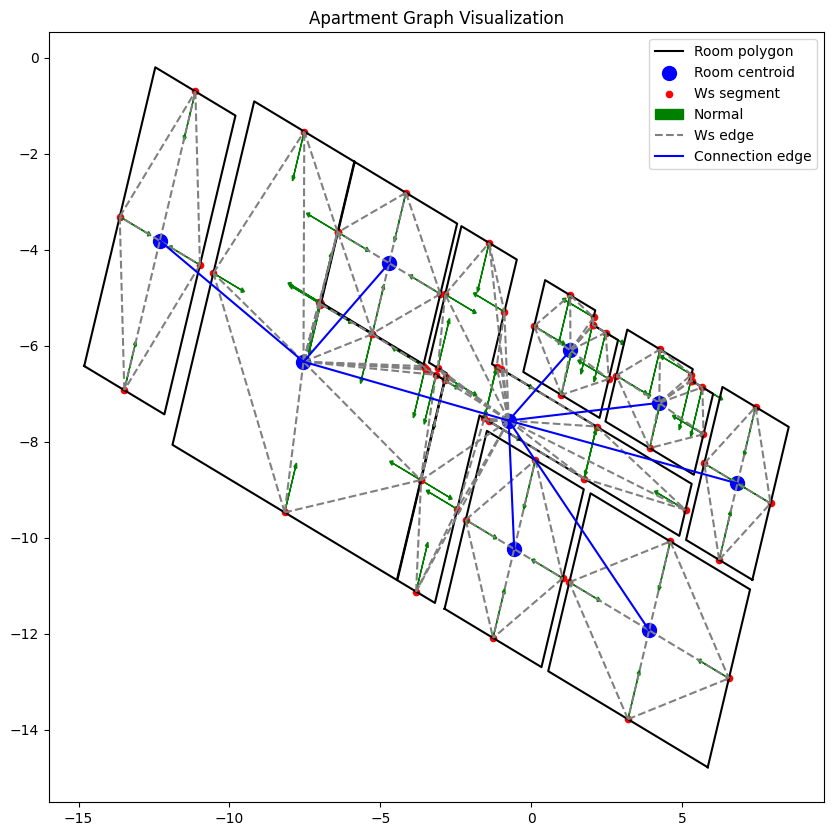

[(0, {'polygon': [(5.846049326444277, -14.779839661155272), (0.5601585648652261, -12.778463267850064), (1.9623488861879341, -9.075099477686202), (7.248239647766985, -11.076475870991409), (5.846049326444277, -14.779839661155272)], 'center': [3.9041991063161054, -11.927469569420737, 1.3], 'normal': [0, 0, 1], 'type': 'room', 'category': 0, 'category_letter': 'Bedroom'}), (1, {'geom': [array([  5.84604933, -14.77983966]), array([  0.56015856, -12.77846327])], 'polygon': [(5.846049326444277, -14.779839661155272), (0.5601585648652261, -12.778463267850064), (0.5601585648652261, -12.768463267850064), (5.846049326444277, -14.769839661155272), (5.846049326444277, -14.779839661155272)], 'center': [3.2031039456547514, -13.779151464502668, 1.3], 'normal': [0.3540947755505674, 0.9352095433258759, 0.0], 'width': 5.652092409986421, 'type': 'ws', 'category': 9}), (2, {'geom': [array([  0.56015856, -12.77846327]), array([ 1.96234889, -9.07509948])], 'polygon': [(0.5601585648652261, -12.778463267850064)

In [ ]:
print(original_graphs[53].graph['name'])
print(len(original_graphs[53].nodes))
print(len(original_graphs[53].edges))
# remove all node which has type != "room" or "ws"
def remove_non_room_ws(graphs):
    for graph in graphs:
        nodes_to_remove = [n for n, d in graph.nodes(data=True) if d['type'] not in ['room', 'ws']]
        graph.remove_nodes_from(nodes_to_remove)
    return graphs
original_graphs = remove_non_room_ws(original_graphs)
noise_graphs = remove_non_room_ws(noise_graphs)

# convert id to int
for i, graph in enumerate(original_graphs):
    original_graphs[i] = nx.convert_node_labels_to_integers(graph, first_label=0, ordering='default')
for i, graph in enumerate(noise_graphs):
    noise_graphs[i] = nx.convert_node_labels_to_integers(graph, first_label=0, ordering='default')


print(len(original_graphs[53].nodes))
print(len(original_graphs[53].edges))
plot_a_graph([original_graphs[53]], viz_rooms=True, viz_ws=True, viz_openings=False, viz_room_connection=True, viz_normals=False, viz_room_normals=True, viz_walls=False)
print(original_graphs[53].nodes(data=True))
print(original_graphs[53].edges(data=True))

#### Generate G1,G2,GT dataset

Data(x=[77, 9], edge_index=[2, 144], node_names=[77], name='53')
G1 nodes: tensor([ 3.0725e+00, -3.0725e+00,  8.7680e-01, -1.9459e+00, -1.1921e+01,
         5.6390e-03, -2.2504e-02,  3.0725e+00, -1.3113e+00])
Data(x=[77, 9], edge_index=[2, 144], node_names=[77], name='53')
G2 permuted nodes: tensor([ -0.3254,   0.3254,   0.2224,  -1.3667, -11.9209,  -0.5202,  -1.4156,
         -0.3254,   1.1410])
Ground truth permutation:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.])


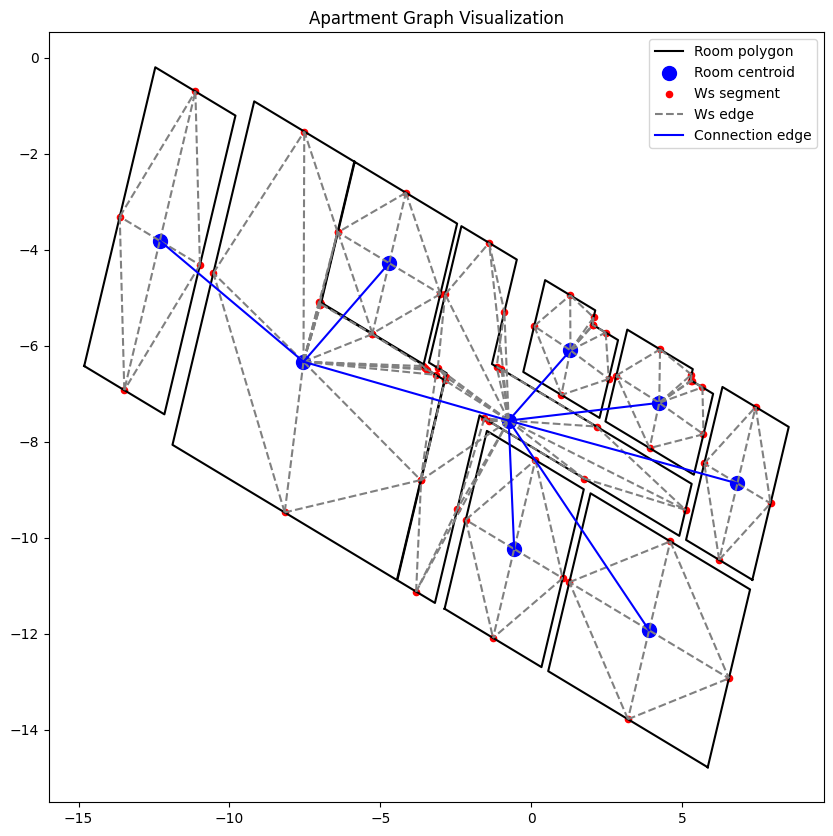

In [ ]:
train, val, test = split_graphs(original_graphs)

train_list = []
for i, g1 in enumerate(train):
    generate_matching_pair_as_data(g1, g1, train_list)

val_list = []
for i, g1 in enumerate(val):
    generate_matching_pair_as_data(g1, g1, val_list)

test_list = []
for i, g1 in enumerate(test):
    generate_matching_pair_as_data(g1, g1, test_list)


# compute mean and std
mean, std = compute_mean_std(train_list)

# Normalizzazione dei set
train_pairs_norm = normalize_data_pairs(train_list, mean, std)
val_pairs_norm = normalize_data_pairs(val_list, mean, std)
test_pairs_norm = normalize_data_pairs(test_list, mean, std)


# Visualize the two graphs
g1_out, g2_perm, gt_perm = train_list[0]

print(g1_out)
print("G1 nodes:", g1_out.x[0])
print(g2_perm)
print("G2 permuted nodes:", g2_perm.x[0])
print("Ground truth permutation:\n", gt_perm[0])

g1_out = pyg_data_to_nx_digraph(g1_out, original_graphs)
g2_perm = pyg_data_to_nx_digraph(g2_perm, original_graphs)

plot_a_graph(
    graphs_list=[g1_out],
    viz_rooms=True,
    viz_ws=True,
    viz_openings=False,
    viz_room_connection=True,
    viz_normals=False,
    viz_room_normals=False,
    viz_walls=False
)

In [ ]:
class GraphMatchingDataset(Dataset):
    def __init__(self, pairs):  # lista di (Data, Data, P)
        self.pairs = pairs

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        return self.pairs[idx]  # data1, data2, P

def collate_pyg_matching(batch):
    data1_list, data2_list, perm_list = zip(*batch)
    batch1 = Batch.from_data_list(data1_list)
    batch2 = Batch.from_data_list(data2_list)
    return batch1, batch2, perm_list

train_dataset = GraphMatchingDataset(train_list)
val_dataset = GraphMatchingDataset(val_list)
test_dataset = GraphMatchingDataset(test_list)

### Model

In [ ]:
class MatchingModel_2GCN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        self.gnn = nn.ModuleList([
            GCNConv(in_dim, hidden_dim),
            GCNConv(hidden_dim, out_dim)
        ])

    def encode(self, x, edge_index):
        for i, conv in enumerate(self.gnn):
            x = conv(x, edge_index)
            if i < len(self.gnn) - 1:
                x = F.relu(x)
        return x  # shape [num_nodes, out_dim]

    def forward(self, x1, edge_index1, x2, edge_index2):
        """
        Args:
            x1, x2: node features of graph 1 and 2 (shapes [N, in_dim])
            edge_index1, edge_index2: edge indices of graph 1 and 2 ([2, num_edges])

        Returns:
            scores: similarity matrix [N, N], where scores[i, j] = node i in G1 vs node j in G2
        """
        h1 = self.encode(x1, edge_index1)  # [N, D]
        h2 = self.encode(x2, edge_index2)  # [N, D]
        scores = torch.matmul(h1, h2.T)    # [N, N]
        return scores

### Training

In [ ]:
def train_epoch(model, loader, optimizer):
    """
    Train the model for one epoch and return the average loss and the embeddings.

    Returns:
        avg_loss, h1_all (list of h1), h2_all (list of h2)
    """
    model.train()
    total_loss = 0
    h1_all, h2_all = [], []

    for batch1, batch2, P in loader:
        optimizer.zero_grad()

        x1, edge1 = batch1.x.to(device), batch1.edge_index.to(device)
        x2, edge2 = batch2.x.to(device), batch2.edge_index.to(device)
        batch_idx1 = batch1.batch.to(device)
        batch_idx2 = batch2.batch.to(device)

        h1 = model.encode(x1, edge1)
        h2 = model.encode(x2, edge2)

        loss = 0.0
        B = len(P)

        for i in range(B):
            h1_i = h1[batch_idx1 == i]
            h2_i = h2[batch_idx2 == i]

            sim = torch.matmul(h1_i, h2_i.T)
            loss += F.binary_cross_entropy_with_logits(sim, P[i])

            h1_all.append(h1_i)
            h2_all.append(h2_i)

        loss /= B
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(loader)
    return avg_loss, h1_all, h2_all


def evaluate(model, loader):
    """
    Evaluate the model on a validation/test set and return both accuracy and loss.

    Returns:
        accuracy, avg_loss
    """
    model.eval()
    correct = 0
    total = 0
    total_loss = 0

    with torch.no_grad():
        for batch1, batch2, P in loader:
            x1, edge1 = batch1.x.to(device), batch1.edge_index.to(device)
            x2, edge2 = batch2.x.to(device), batch2.edge_index.to(device)
            batch_idx1 = batch1.batch.to(device)
            batch_idx2 = batch2.batch.to(device)


            h1 = model.encode(x1, edge1)
            h2 = model.encode(x2, edge2)

            B = len(P)

            for i in range(B):
                h1_i = h1[batch_idx1 == i]
                h2_i = h2[batch_idx2 == i]

                sim = torch.matmul(h1_i, h2_i.T)

                pred = sim.argmax(dim=1)
                target = P[i].argmax(dim=1)

                correct += (pred == target).sum().item()
                total += h1_i.size(0)

                total_loss += F.binary_cross_entropy_with_logits(sim, P[i], reduction='sum').item()

    avg_loss = total_loss / total if total > 0 else 0.0
    accuracy = correct / total if total > 0 else 0.0
    return accuracy, avg_loss


In [ ]:
# Paths for saving models
best_val_model_path = os.path.join(GNN_PATH, 'best_val_model.pt')
final_model_path = os.path.join(GNN_PATH, 'final_model.pt')

# Define hyperparameters
in_dim = 9  # Dimension of node features
hidden_dim = 64  # Hidden dimension for GNN
out_dim = 32  # Output dimension for GNN
num_epochs = 100
learning_rate = 0.001
batch_size = 2

# Early stopping parameters
best_val_loss = float('inf')
patience = 20
patience_counter = 0
best_epoch = -1  # To track when best model was found


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_pyg_matching, generator=g)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_pyg_matching)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_pyg_matching)

model = MatchingModel_2GCN(in_dim=in_dim, hidden_dim=hidden_dim, out_dim=out_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


train_losses = []
val_losses = []

print("Starting training...")

for epoch in range(num_epochs):
    # Train for one epoch
    train_loss, _, _ = train_epoch(model, train_loader, optimizer)
    # Evaluate on validation set
    _, val_loss = evaluate(model, val_loader)
    # Accumulate Losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Check if validation improved
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_epoch = epoch
        # Save the best model seen so far
        torch.save(model.state_dict(), best_val_model_path)
    else:
        patience_counter += 1

    # Print progress every 100 epochs
    if epoch % 100 == 0 or epoch == num_epochs - 1:
        print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Early stopping check
    if patience_counter >= patience:
        print(f"Early stopping triggered at epoch {epoch}.")
        break

# Save the final model
torch.save(model.state_dict(), final_model_path)
print("\nTraining completed.")

Starting training...
Epoch 0 | Train Loss: 89.9758 | Val Loss: 2324.8871
Epoch 99 | Train Loss: 0.6945 | Val Loss: 53.4896

Training completed.


### Training and Evalutation results

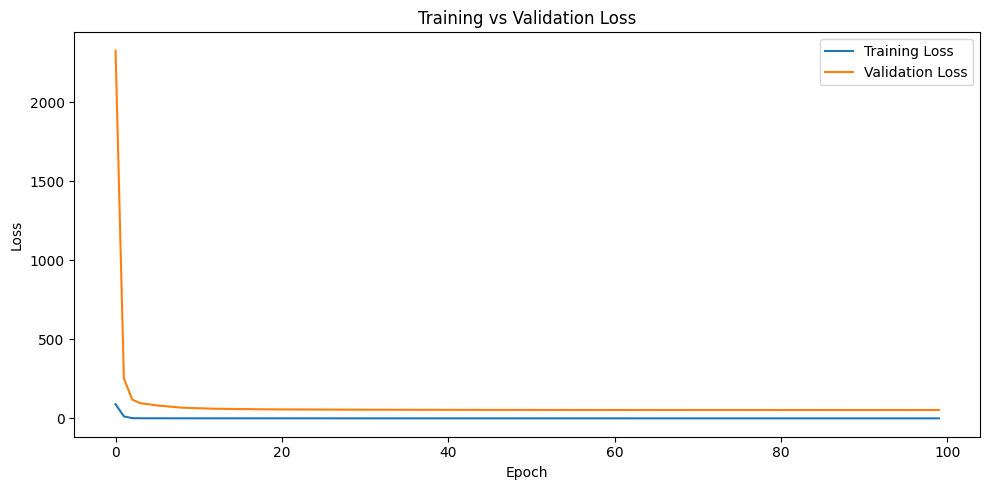

In [ ]:
plot_losses(train_losses, val_losses, os.path.join(GNN_PATH, 'losses.png'))

In [ ]:
# Load the best model
model.load_state_dict(torch.load(best_val_model_path, map_location=device))
model.to(device)

# Evaluate on the test set
test_acc, test_loss = evaluate(model, test_loader)
print(f"Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

Test Accuracy: 0.1983 | Test Loss: 57.2240


### Inference

In [ ]:
def predict_matching_matrix(model, data1, data2, hard=True):
    model.eval()
    with torch.no_grad():
        data1 = data1.to(device)
        data2 = data2.to(device)
        h1 = model.encode(data1.x, data1.edge_index)
        h2 = model.encode(data2.x, data2.edge_index)
        sim = torch.matmul(h1, h2.T)  # [N1, N2]

        if hard:
            pred = sim.argmax(dim=1)
            P_pred = torch.zeros_like(sim)
            P_pred[torch.arange(sim.size(0)), pred] = 1
            return P_pred
        else:
            return F.softmax(sim, dim=1)

# use the model to predict the matching on a test graph
g1_out, g2_perm, gt_perm = test_list[0]
start_time = time.time()
P_pred = predict_matching_matrix(model, g1_out, g2_perm, hard=True)
end_time = time.time()

inference_time = end_time - start_time
print(f"Inference time: {inference_time:.6f} seconds")
print(P_pred)  # matrice binaria di permutazione predetta


Inference time: 0.028334 seconds
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### Visualization of results

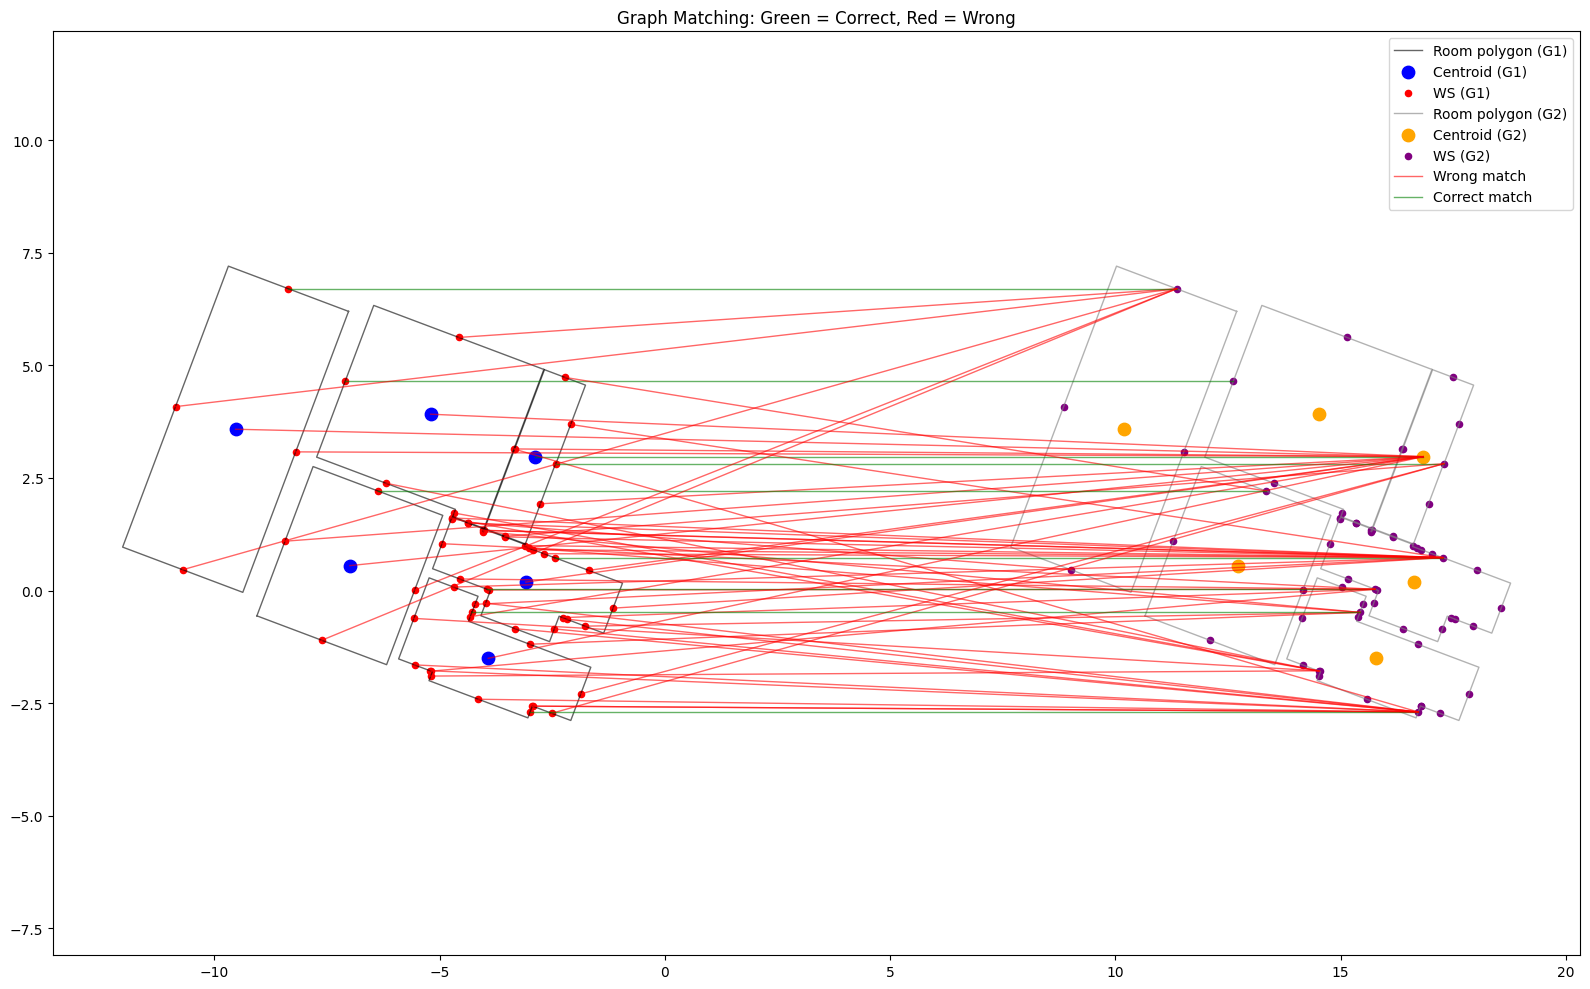

In [ ]:
plot_two_graphs_with_matching(
    [g1_out, g2_perm],
    gt_perm=gt_perm,
    pred_perm=P_pred,
    original_graphs=original_graphs,
    viz_rooms=True,
    viz_ws=True,
    match_display="all",
)